# **Medical Readmission**
## WGU D206: Data Cleaning
### Natalie Toler

---------

## Table of Contents
### Part 1: Research Questions and Variables
#### A. Research Question
#### B. Variables

### Part 2: Data-Cleaning Plan
#### C. Detection
>##### 1. Methods
>##### 2. Why
>##### 3. Programming Language
>##### 4. Code

### Part 3: Data Cleaning
#### D. Treatment
>##### 1. Findings
>##### 2. Why
>##### 3. Results
>##### 4. Code
>##### 5. CSV File
>##### 6. Disadvantages
>##### 7. Challenges

### Part 4: PCA and Sources
#### E. PCA
>##### 1. Variables and Output
>##### 2. PCs to Keep
>##### 3. PCA Benefits
#### F. Panopto Recording
#### G. Code Sources
#### H. References

### Part 1: Research Question and Variables

In [1]:
# Before starting I will set up the space, loading in the needed libraries and data that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import seaborn as sb
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
%matplotlib inline

df=pd.read_csv('medical_raw_data.csv', index_col=False)
df.head() # I want to see a snapshot of the data

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


#### A. The Research Question

**What factors play a role in medical readmission?**

The business problem presented here is medical readmission. Patience being readmitted to hospitals is fined by the Centers for Medicare and Medicaid Services and so getting the numbers decreased is an important task for hospitals. The data provided is from a medical hospital chain across the United States who are looking to decrease their readmission count. Before a business plan can be created we first need to understand what variables affect the readmission rate. Therefore to start the analysis my research question is: which of the provided variables affects readmission rate? In order to find out this information I will need to clean the entire dataset so that each variable can be looked at as accurately as possible. From this further analysis would be done on the variables that are found to have significant affects on readmission. 

#### B. The Variables

The dataset is comprised of 10,000 customers and 50 variables. 

* CaseOrder - This variable is just to preserve the order of the data.
* Customer_id - Each row should have a unique customer_id which indentifies individual patients. 
* Interaction and UID - These two variables are unique to each patient and the procedures and admissions.

Let's look at a sample of these four variables in the dataset and grab their datatype and other info.

In [2]:
id_variables = ['CaseOrder', 'Customer_id', 'Interaction', 'UID']
sample = df[id_variables].sample(n=5)
print(sample)

      CaseOrder Customer_id                           Interaction  \
9260       9261     S115189  5aa51250-b45f-4b32-a589-74dde0a15076   
2573       2574     E784001  217dde07-1ac2-439b-b8e2-ba1f558a118b   
3505       3506     G620554  ec9b8236-6b51-488e-abba-30f73059cc24   
9628       9629     X941735  1cdc9fbd-873c-4571-9f9f-1621b569f5d5   
5214       5215     J495095  96cf0d46-c7c7-420e-b432-a789cc68086c   

                                   UID  
9260  9754fe3ca135ac7bac630570e20ba662  
2573  e9e77960782fa5e80756f6dcbfb14620  
3505  6cb80c307d5dde4a307ed50977d2e9c7  
9628  d3d7ec8030999253444f8032f28ba112  
5214  6f522d96efa6b39e1741816f98507611  


In [3]:
id_variables = df[id_variables]
id_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CaseOrder    10000 non-null  int64 
 1   Customer_id  10000 non-null  object
 2   Interaction  10000 non-null  object
 3   UID          10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


As we can see here these variables are qualitative. The CaseOrder column is an index and not truly a variable. Customer_id, Interaction, and UID however are qualitative variables that will be used. CaseOrder is stored as an Int which is fine because we won't be using it in any analysis. The other three variables, Customer_id, Interaction, and UID are stored appropriately as objects.

The next set of variables are customer demographics. These include City, state, county, zip code and latitude and longitude which all identify where a patient has for their billing and assumingly correlates fairly well to where the patient lives. We also have variables for population which is the population, based on census data, within a mile radius of the patient's address, area which is the type of community, whether rural, urban, or suburban, again based on census data. And the TimeZone the patient lives within. City, state, county, zip code, area, and timezone are all qualitative variables. While latitude, longitude, and population are quantitative. 

Let's take a look at a sample of these locational variables. 

In [4]:
location_variables = ['City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone']
sample = df[location_variables].sample(n=5)
print(sample)

              City State      County    Zip       Lat        Lng  Population  \
422      Hollywood    FL     Broward  33027  25.98245  -80.34359       60191   
3992      Superior    NE    Nuckolls  68978  40.06335  -98.09144        2153   
7504  New Richmond    IN  Montgomery  47967  40.19668  -87.00164         564   
1827     Talbotton    GA      Talbot  31827  32.68709  -84.52690        2174   
6191      Fairview    MT    Richland  59221  47.92807 -104.19223        1870   

          Area                      Timezone  
422      Urban              America/New_York  
3992     Rural               America/Chicago  
7504     Rural  America/Indiana/Indianapolis  
1827     Urban              America/New_York  
6191  Suburban                America/Denver  


In [5]:
location_variables = df[location_variables]
location_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        10000 non-null  object 
 1   State       10000 non-null  object 
 2   County      10000 non-null  object 
 3   Zip         10000 non-null  int64  
 4   Lat         10000 non-null  float64
 5   Lng         10000 non-null  float64
 6   Population  10000 non-null  int64  
 7   Area        10000 non-null  object 
 8   Timezone    10000 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


The rest of the patient demographic variables are specific to a patient's job and home life. Job states the job of the patient or that of the primary insurance holder. Children is the number of children that patient reports to have. Age is the patient's age at the time of admission. Education is the highest earned degree of the patient. Employment is the employment status of the patient. Income is the annual income of the patient or the primary insurance holder. Marital is the marital status of the patient or primary insurance holder. And the last variable is gender which is the self-identified gender of the parient with only three option, Male, Female, and non-binary. 

Of these variables Job, Education, Employment, Marital, and Gender are qualitative variables. While Children, Age, and Income are quantitative. 

In [6]:
demographic_variables = ['Job', 'Children', 'Age', 'Education', 'Employment', 'Income', 'Marital', 'Gender']
sample = df[demographic_variables].sample(n=5)
print(sample)

                              Job  Children   Age  \
2657       Advertising copywriter       NaN   NaN   
6999  Scientist, research (maths)       0.0  77.0   
9247                 Toxicologist       1.0   NaN   
3795         Sports administrator       1.0  19.0   
4595           Arts administrator       3.0  50.0   

                                     Education  Employment    Income  \
2657               Nursery School to 8th Grade   Full Time  79870.64   
6999             GED or Alternative Credential  Unemployed   5612.38   
9247            Some College, Less than 1 Year     Retired  22516.10   
3795  Some College, 1 or More Years, No Degree   Full Time  33080.23   
4595                           Master's Degree   Part Time  48666.80   

            Marital  Gender  
2657       Divorced  Female  
6999       Divorced  Female  
9247        Married  Female  
3795      Separated  Female  
4595  Never Married    Male  


In [7]:
demographic_variables = df[demographic_variables]
demographic_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Job         10000 non-null  object 
 1   Children    7412 non-null   float64
 2   Age         7586 non-null   float64
 3   Education   10000 non-null  object 
 4   Employment  10000 non-null  object 
 5   Income      7536 non-null   float64
 6   Marital     10000 non-null  object 
 7   Gender      10000 non-null  object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


The third group of variables are about the patient's medical situation. This starts with the important variable of 'ReAdmis' which is whether the patient was readmitted within a month of release or not. This is a qualitative yes/no binary. 

VitD_levels are the vitamin D levels of the patient in ng/mL. Doc_visits is the number of times the primary physician visited the patient. Full_meals_eaten is the number of meals the patient ate. VitD_supp is the number of times that vitamin D suppliments were given to the patient. These are all quanitative variables. 

Soft_drink is a yes/no binary whether the patient drinks three or more soft drinks a day on average. Initial_admin is what the patient was initially admitted to hospital for. HighBlood is whether the patient has high blood pressure with a yes/no binary instead of numbers. Stroke is whether the patient has ever had a stroke. Complication_risk is the rating for complications for the patient. Overweight is whether the paitent is considered overwheight. Arthritis, diabetes, hyperlipidemia, Backpain, Anxiety, allergic_rhinitis, reflux_esophagitis, and Asthma are all yes/no binaries if the patient has those conditions. Services is the primary service a patient recieved. These are all qualitative variables. 

Initial_days are the number of days the patients was in hospital for the initial visit. Total Charge is the amount that patient is charged, however this number is developed by taking the average charge per patient divided by the number of days they were in hospital. Additional_charges are the average amount charged for specialized treatments.

In [8]:
medical_demographic = ['ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days', 'TotalCharge', 'Additional_charges']
sample = df[medical_demographic].sample(n=5)
print(sample)

     ReAdmis  VitD_levels  Doc_visits  Full_meals_eaten  VitD_supp Soft_drink  \
248       No    14.704421           5                 0          1         No   
7060      No    17.466200           5                 0          0         No   
8168      No    17.310000           6                 1          0         No   
8849     Yes    13.113454           4                 0          1        NaN   
7158     Yes    20.664207           4                 2          0        Yes   

              Initial_admin HighBlood Stroke Complication_risk  ...  \
248      Elective Admission       Yes     No            Medium  ...   
7060     Elective Admission        No     No               Low  ...   
8168    Emergency Admission        No     No            Medium  ...   
8849  Observation Admission        No     No              High  ...   
7158    Emergency Admission        No    Yes              High  ...   

      Hyperlipidemia BackPain Anxiety Allergic_rhinitis Reflux_esophagitis  \
248     

In [9]:
medical_demographic = df[medical_demographic]
medical_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ReAdmis             10000 non-null  object 
 1   VitD_levels         10000 non-null  float64
 2   Doc_visits          10000 non-null  int64  
 3   Full_meals_eaten    10000 non-null  int64  
 4   VitD_supp           10000 non-null  int64  
 5   Soft_drink          7533 non-null   object 
 6   Initial_admin       10000 non-null  object 
 7   HighBlood           10000 non-null  object 
 8   Stroke              10000 non-null  object 
 9   Complication_risk   10000 non-null  object 
 10  Overweight          9018 non-null   float64
 11  Arthritis           10000 non-null  object 
 12  Diabetes            10000 non-null  object 
 13  Hyperlipidemia      10000 non-null  object 
 14  BackPain            10000 non-null  object 
 15  Anxiety             9016 non-null   float64
 16  Aller

And finally we have the last set of variables. These are the answers to survey questions about how important certain factors are to a patient on a scale of 1 to 8 with 1 being most important and 8 being least important. 

* Item1 - Timely Admission
* Item2 - Timely Treatment
* Item3 - Timely Visits
* Item4 - Reliability
* Item5 - Options
* Item6 - Hours of Treatment
* Item7 - Courteous Staff
* Item8 - Evidence of Active Listening from doctor

These are qualitative variables. 

In [10]:
survey = ['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
sample = df[survey].sample(n=5)
print(sample)

      Item1  Item2  Item3  Item4  Item5  Item6  Item7  Item8
7982      3      2      3      2      3      3      4      4
5179      4      5      4      4      3      5      4      3
8290      4      4      3      3      4      5      5      4
1197      3      4      5      6      2      4      4      3
4655      4      3      4      4      3      3      4      4


In [11]:
survey = df[survey]
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Item1   10000 non-null  int64
 1   Item2   10000 non-null  int64
 2   Item3   10000 non-null  int64
 3   Item4   10000 non-null  int64
 4   Item5   10000 non-null  int64
 5   Item6   10000 non-null  int64
 6   Item7   10000 non-null  int64
 7   Item8   10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


### Part 2: Data-Cleaning Plan

#### C. Detection

For the purpose of this course and the research question I will be go through each variable to check for duplicates, missing values, outlies in the quantitative variables, and other quality issues that need to be fixed before analysis can happen. Since this section is only discussion of the methods used please see Part 3 for the implementation of the code.

1. Methods
    * To get a snapshot of the data I will use `df.info()` and make sure that the columns are in the correct datatypes and see any missing data. Since I know that there are 10000 rows I will expect any rows with less to be nulls. 
    * Once I have an idea of the full dataset I will go into each variable to examine the contents are consistent and correct. I will do this by using `value_counts()`, `describe()`, `nunuique()`, and `isnull()` functions. 
    * For appropriate variables I will use histograms - `plt.hist()` - to visualize the distribution of the data.
    * For categorical data I will use `value_counts()` and `nunique()` to ensure proper classification.
    * For quantitative data I will use `describe()` to see the statistics for the variables and use histograms and box plots to detect outliers.
    ---
    
2. Why
    * This method of detection using logical steps going from a big picture of the data to be able to pick out any variables that need extra cleaning and then going through each variable for any inconsistencies in the data. Doing it this way I can ensure that no variable is missed in the exploration of the data and that each variable has been explored thoroughly. This is important since the research question and the guidelines of this project want me to clean the entire dataset. 
    
    * Using Functions like `describe()` and `plt.hist()` will allow me to see the statistics of each variable which will help in the process of cleaning. While finding null values and the unique values in each column will allow me to ensure data integrity by making sure the data is consistent. 
    ---
    
3. Programming Language
    * Python is an open source, coding specific language that has consistent syntax and a large amount of libraries to increase the usability. Using the libraries `pandas` and `numpy` I will be able to do write simple and clear code that will be easy to follow. I also will have access to `matplotlib` and `seaborn` for creating visuals that are pleasing but simple. 
    
    ---
    
4. Code:

In [12]:
# First I am going to check the data types, null counts, and size of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [13]:
# I want to check why Overweight and Anxiety are stored as floats when they should be objects.
df['Overweight'].unique()

array([ 0.,  1., nan])

In [14]:
# And double checking that anxiety is the same
df['Anxiety'].unique()

array([ 1., nan,  0.])

In [15]:
# Since Case Order is a placeholder variable there should be 10,000 unique results
df['CaseOrder'].nunique()

10000

In [16]:
# Customer_id is a key so it should also have no duplicates
df['Customer_id'].nunique()

10000

In [17]:
# Interaction should also have no duplicates
df['Interaction'].nunique()

10000

In [18]:
# And finally the UID should have no duplicates
df['UID'].nunique()

10000

In [19]:
# The next variables I want to check for consistency in their entries
# City is a categorical variable and therefore I just want to make sure that the naming convention seems the same throughout
df['City'].value_counts()

City
Houston             36
San Antonio         26
Springfield         22
New York            21
Miami               21
                    ..
Coyote               1
Tiline               1
Monon                1
Sullivans Island     1
Coraopolis           1
Name: count, Length: 6072, dtype: int64

In [20]:
# I also want to check the number of unique cities
df['City'].nunique()

6072

In [21]:
# State is another categorical value so I want to make sure the naming the consistent
df['State'].value_counts()

State
TX    553
CA    550
PA    547
NY    514
IL    442
OH    383
MO    328
FL    304
VA    287
IA    276
MI    273
MN    267
NC    254
GA    247
KS    220
WI    214
KY    210
OK    207
WV    207
IN    195
AL    194
TN    194
WA    191
AR    190
NE    185
CO    179
NJ    176
LA    173
MA    149
MS    134
MD    131
SC    128
SD    123
ME    122
OR    122
MT    112
NM    110
ID    109
ND    108
AZ    108
CT     80
NH     79
UT     72
AK     70
VT     60
NV     51
WY     51
PR     43
HI     34
DE     17
RI     14
DC     13
Name: count, dtype: int64

In [22]:
# Again County is categorical so checking naming and the number of unique counties
df['County'].value_counts()

County
Jefferson      118
Washington     100
Franklin        93
Los Angeles     88
Montgomery      80
              ... 
Jenkins          1
Sully            1
Panola           1
Kandiyohi        1
Sterling         1
Name: count, Length: 1607, dtype: int64

In [23]:
# How many unique counties are listed
df['County'].nunique()

1607

In [24]:
# Zip is a categorical value that is a number so it is stored as an int which I think is fine but I don't need to look at the stats because they won't tell me anything
df['Zip'].value_counts()

Zip
25674    4
78104    4
68355    4
62098    4
24136    4
        ..
18337    1
58442    1
71353    1
81612    1
15108    1
Name: count, Length: 8612, dtype: int64

In [25]:
# How many Unique zipcodes are listed
df['Zip'].nunique()

8612

In [26]:
# Because Zip is stored as an int and I know that some zipcodes start with 0 I want to see if the 0's have disappeared
all_have_five_values = all(len(str(value)) == 5 for value in df['Zip'])
print(all_have_five_values)

False


In [27]:
# Similar to zip I don't need to get the stats for lat and long but want to check the values.
df['Lat'].value_counts()

Lat
36.06702    4
33.34798    4
35.25512    4
39.38610    4
37.86890    4
           ..
41.00911    1
39.20560    1
46.36035    1
34.96563    1
40.49998    1
Name: count, Length: 8588, dtype: int64

In [28]:
# Number of unique Latitudes
df['Lat'].nunique()

8588

In [29]:
# Ensure Longitude looks consistent
df['Lng'].value_counts()

Lng
-121.28753    4
-82.35159     4
-85.99134     4
-105.68001    4
-89.03658     4
             ..
-74.87894     1
-99.17911     1
-91.81854     1
-106.83727    1
-80.19959     1
Name: count, Length: 8601, dtype: int64

In [30]:
# number of unique Longitudes
df['Lng'].nunique()

8601

In [31]:
# Population is a qualitative variable whose statistics do matter therefore I want to check the stats. 
df['Population'].describe()

count     10000.000000
mean       9965.253800
std       14824.758614
min           0.000000
25%         694.750000
50%        2769.000000
75%       13945.000000
max      122814.000000
Name: Population, dtype: float64

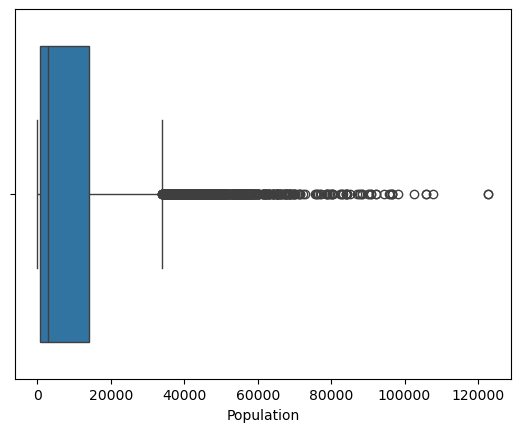

In [32]:
# I also want to check for outliers using a boxplot 
sb.boxplot(x='Population', data=df);

In [33]:
# Since there are outliers here I want to see the rows to compare the population to the city and state to make sure they aren't errors.
population_outliers = df.sort_values(by='Population', ascending=False)
population_outliers.head(10)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
3024,3025,3025,W840448,7c8ccd98-1619-4492-99a7-b1dd82a713be,02cd4f72ff3415f684ab0847e47feffd,Katy,TX,Harris,77449,29.83556,...,3512.884445,9681.145576,1,2,1,3,3,2,2,3
9662,9663,9663,Y770582,7096d230-358f-4244-b05c-70aa3143572f,be3f3df437c3b7b114dc7d24b1a48bfc,Katy,TX,Harris,77449,29.83556,...,7579.972371,23055.202380,3,3,4,3,4,3,4,4
5965,5966,5966,Q787284,121150ca-a1fc-4ba7-aa48-6b7893d0eb0e,8356f8d77795cf648b1f66b4af5f1577,Houston,TX,Harris,77084,29.82641,...,6322.209553,17661.148880,4,5,3,4,3,4,4,4
7686,7687,7687,N145589,9ec70eec-90f7-4ba5-a266-df39435d1cd2,6b797b8b5e27596ef3475e8f57156ead,Pacoima,CA,Los Angeles,91331,34.25563,...,7017.880292,8641.444199,4,3,4,4,4,3,4,3
767,768,768,E632881,e7758807-cc96-4396-a8c5-ff54d26882cc,3008f82476a1bca85459d1b3270a3f8f,Pacoima,CA,Los Angeles,91331,34.25563,...,4841.089677,6955.299837,4,3,5,4,2,5,6,5
6502,6503,6503,E829459,49f39b11-6302-4aaa-9ce0-181464c276c3,ea1dc42b7bc8d7a0ed357806b44db219,Brooklyn,NY,Kings,11211,40.71244,...,7727.413694,7351.289866,4,2,3,3,4,3,4,5
9118,9119,9119,U443326,a01d4468-5714-4cec-944a-9607c65ba8a3,2ae17c120159894d8ba29ad15eeb6292,Mckinney,TX,Collin,75070,33.17311,...,7183.655448,8076.992596,4,3,4,4,4,3,4,4
7902,7903,7903,P178567,ce9ca244-a080-4d71-a1c0-50d7bd43c20d,1a4203b1730198afc9bc7b1b697a609d,San Juan,PR,San Juan,926,18.34620,...,7375.742016,12019.232560,4,4,4,3,4,4,3,4
6813,6814,6814,A523275,3836f558-f903-416b-ab8e-9b15faa624d1,e13bfaa7fc03cac2f7e48e9eb29757e8,San Juan,PR,San Juan,926,18.34620,...,7785.859602,26573.555480,3,4,4,5,3,3,4,4
6686,6687,6687,R295268,6ea0af09-7536-41ff-9800-c09fbc6a668b,33129b04dbe49d9623900e922ffe1e55,Sylmar,CA,Los Angeles,91342,34.31515,...,8687.545684,4962.995354,6,6,7,3,4,5,5,4


In [34]:
# Value counts of area to ensure correct data
df['Area'].value_counts()

Area
Rural       3369
Suburban    3328
Urban       3303
Name: count, dtype: int64

In [35]:
# Value counts of Timezone to make sure the naming conventions are consistent
df['Timezone'].value_counts()

Timezone
America/New_York                  3889
America/Chicago                   3771
America/Los_Angeles                937
America/Denver                     612
America/Detroit                    262
America/Indiana/Indianapolis       151
America/Phoenix                    100
America/Boise                       86
America/Anchorage                   50
America/Puerto_Rico                 43
Pacific/Honolulu                    34
America/Menominee                   14
America/Nome                        12
America/Indiana/Vincennes            8
America/Kentucky/Louisville          6
America/Sitka                        6
America/Toronto                      5
America/Indiana/Marengo              3
America/Indiana/Tell_City            3
America/North_Dakota/Beulah          2
America/Yakutat                      1
America/Indiana/Winamac              1
America/Indiana/Knox                 1
America/North_Dakota/New_Salem       1
America/Indiana/Vevay                1
America/Adak    

In [36]:
# Checking the Job naming
df['Job'].value_counts()

Job
Outdoor activities/education manager     29
Exhibition designer                      27
Theatre director                         27
Scientist, audiological                  26
Toxicologist                             25
                                         ..
Government social research officer        6
Phytotherapist                            6
Engineer, control and instrumentation     6
Public relations account executive        6
Licensed conveyancer                      6
Name: count, Length: 639, dtype: int64

In [37]:
# Since there are so many jobs, which tracks, I want to see how many unique jobs there are
df['Job'].nunique()

639

In [38]:
# I want to see the unique values for children
df['Children'].value_counts()

Children
0.0     1880
1.0     1858
3.0     1113
2.0     1094
4.0      739
8.0      157
7.0      154
6.0      145
5.0      126
9.0       83
10.0      63
Name: count, dtype: int64

In [39]:
# I want to get the statistics on children since it is a quantitative variable
df['Children'].describe()

count    7412.000000
mean        2.098219
std         2.155427
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64

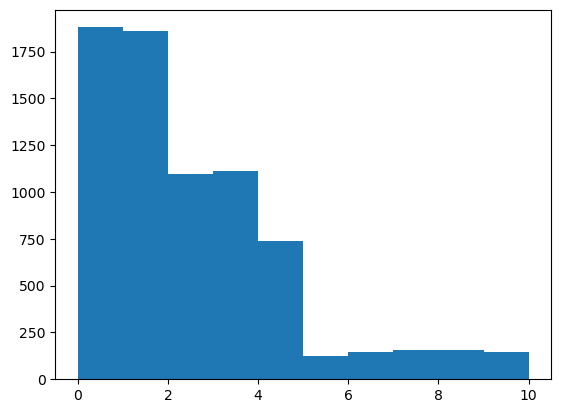

In [40]:
# And I want to get the distribution of children
plt.hist(df['Children']);

In [41]:
# Get the values of ages
df['Age'].value_counts()

Age
30.0    126
47.0    124
74.0    123
38.0    123
40.0    122
       ... 
75.0     90
82.0     90
63.0     90
51.0     89
36.0     85
Name: count, Length: 72, dtype: int64

In [42]:
# The number of unique ages
df['Age'].nunique()

72

In [43]:
# Statistics of the age variable
df['Age'].describe()

count    7586.000000
mean       53.295676
std        20.659182
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

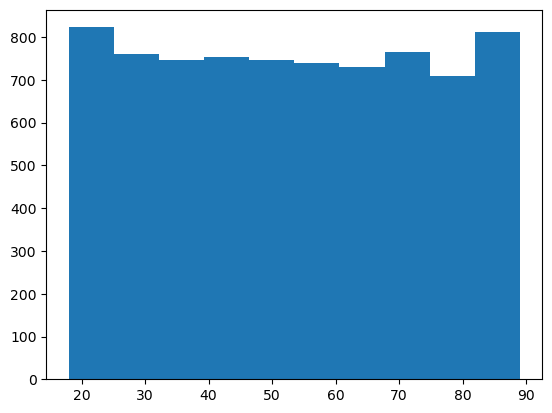

In [44]:
# Histogram of age
plt.hist(df['Age']);

In [45]:
# The value counts of education
df['Education'].value_counts()

Education
Regular High School Diploma                 2444
Bachelor's Degree                           1724
Some College, 1 or More Years, No Degree    1484
9th Grade to 12th Grade, No Diploma          832
Associate's Degree                           797
Master's Degree                              701
Some College, Less than 1 Year               642
Nursery School to 8th Grade                  552
GED or Alternative Credential                389
Professional School Degree                   208
No Schooling Completed                       133
Doctorate Degree                              94
Name: count, dtype: int64

In [46]:
# Value counts of employment
df['Employment'].value_counts()

Employment
Full Time     6029
Student       1017
Part Time      991
Unemployed     983
Retired        980
Name: count, dtype: int64

In [47]:
# Statistics of the Income variable
df['Income'].describe()

count      7536.000000
mean      40484.438268
std       28664.861050
min         154.080000
25%       19450.792500
50%       33942.280000
75%       54075.235000
max      207249.130000
Name: Income, dtype: float64

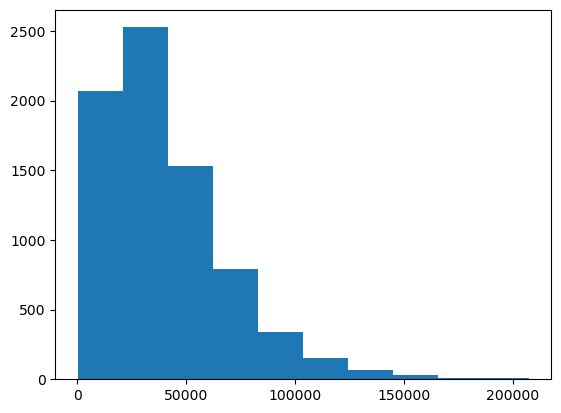

In [48]:
# Histogram of Income
plt.hist(df['Income']);

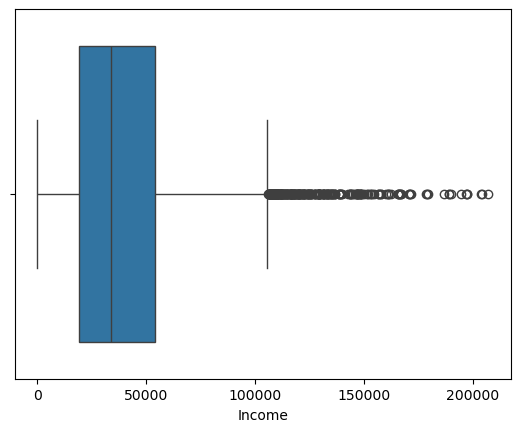

In [49]:
# Box plot of Income
sb.boxplot(x='Income', data=df);

In [50]:
# Checking the outliers of income similar to the outliers of population
income_outliers = df.sort_values(by='Income', ascending=False)
income_outliers.head(10)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
8386,8387,8387,C817840,41770631-ff8b-4e71-9631-f369b04d2125,f81e41a00a41c04266e666361ad49a33,Phoenix,AZ,Maricopa,85044,33.34239,...,7489.400811,6513.572723,4,3,4,1,4,4,3,3
841,842,842,F304162,cbd20767-266b-470b-9bd7-9b8aab96da38,3424165edc18b296b6ec24d69101a2a9,Galloway,WV,Barbour,26349,39.23570,...,3146.021218,14122.636410,3,3,4,5,4,2,2,4
8598,8599,8599,C730234,bb1cdec6-187d-40ac-bcb2-1544f5bb4b1d,609d3ae46250dffa60021c1f62169869,Haywood,VA,Madison,22722,38.46162,...,7562.599269,25561.239910,4,5,5,5,3,4,4,4
6406,6407,6407,J423842,fe003dd7-d9b2-4cc0-b446-fc0c48cdabea,b481a4d89ab6871d664e7f917393a5ba,Scranton,PA,Lackawanna,18504,41.42553,...,7846.974041,10904.204470,3,4,4,4,3,3,4,4
1778,1779,1779,T848406,3c57ca24-c58c-45b0-a96f-928187a615d0,73fffc542bdeb8f39051413f55972023,Mowrystown,OH,Highland,45155,39.03989,...,2791.579250,5308.867753,3,3,5,5,3,3,3,6
7492,7493,7493,O138434,972201d0-4542-45cc-9748-2db92d663edf,a7f7ff8e034f870226a0ef8256f7c85b,Salina,OK,Mayes,74365,36.29622,...,7631.204444,8273.380003,3,4,3,4,4,2,4,4
4331,4332,4332,I799641,b1cc803b-4607-4574-87c0-b21aa78135ce,ee1901d4552a2678a06236c53dd83049,Morris,PA,Tioga,16938,41.57618,...,3429.376296,8770.146235,5,4,5,2,3,5,4,5
7244,7245,7245,Q478271,a747007e-9829-42ad-ac12-0f324843cd22,aa5aa234668bdfcd2be0688809bc6a3c,Rimersburg,PA,Clarion,16248,41.03487,...,8162.333595,29743.707850,2,4,3,4,4,2,2,1
4407,4408,4408,H470636,c0994b61-454e-4c42-8617-26304aa9d717,c57d48f888a7783080049f4246196487,Mine Hill,NJ,Morris,7803,40.87768,...,3006.005976,28085.029480,6,6,7,2,5,4,6,5
3073,3074,3074,O384337,b6858ab0-d64b-49c4-849c-f45ca438b5d7,354d33d91504054b4a9734c7ffb91a36,Elmer,NJ,Salem,8318,39.55629,...,4307.578475,6295.553345,5,4,4,4,3,4,4,5


In [51]:
# Value counts of marital variable
df['Marital'].value_counts()

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

In [52]:
# Value counts of gender variable
df['Gender'].value_counts()

Gender
Female                  5018
Male                    4768
Prefer not to answer     214
Name: count, dtype: int64

In [53]:
# Value counts of ReAdmission
df['ReAdmis'].value_counts()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

In [54]:
# Value counts of Vit_D levels
df['VitD_levels'].value_counts()

VitD_levels
17.802330    1
18.423248    1
15.954743    1
19.566698    1
19.221626    1
            ..
18.107325    1
17.331743    1
49.013013    1
18.292722    1
20.421883    1
Name: count, Length: 10000, dtype: int64

In [55]:
# Looking at the statistics in Vitamin D Levels
df['VitD_levels'].describe()

count    10000.000000
mean        19.412675
std          6.723277
min          9.519012
25%         16.513171
50%         18.080560
75%         19.789740
max         53.019124
Name: VitD_levels, dtype: float64

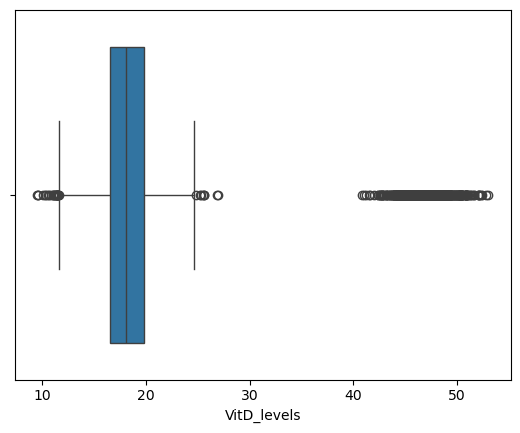

In [56]:
# Checking for outliers in vitamin D levels
sb.boxplot(x='VitD_levels', data=df);

In [57]:
# Value counts for Doctor Visits
df['Doc_visits'].value_counts()

Doc_visits
5    3823
6    2436
4    2385
7     634
3     595
8      61
2      58
1       6
9       2
Name: count, dtype: int64

In [58]:
# Value Counts of meals eaten
df['Full_meals_eaten'].value_counts()

Full_meals_eaten
0    3715
1    3615
2    1856
3     612
4     169
5      25
6       6
7       2
Name: count, dtype: int64

In [59]:
# Value Counts of Vitamin D suppliments
df['VitD_supp'].value_counts()

VitD_supp
0    6702
1    2684
2     544
3      64
4       5
5       1
Name: count, dtype: int64

In [60]:
# Value counts of soft Drinks
df['Soft_drink'].value_counts()

Soft_drink
No     5589
Yes    1944
Name: count, dtype: int64

In [61]:
# Value counts of Initial admission
df['Initial_admin'].value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [62]:
# Value counts of High Blood pressure
df['HighBlood'].value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [63]:
# Value counts for stroke
df['Stroke'].value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [64]:
# Value counts for Complication risk
df['Complication_risk'].value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [65]:
# Value counts for Overweight
df['Overweight'].value_counts()

Overweight
1.0    6395
0.0    2623
Name: count, dtype: int64

In [66]:
# How many null values are in overweight
sum(df['Overweight'].isnull())

982

In [67]:
# Value counts for Arthritis
df['Arthritis'].value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [68]:
# Value counts for diabetes
df['Diabetes'].value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [69]:
# Value counts for Hyperlipidemia
df['Hyperlipidemia'].value_counts()

Hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

In [70]:
# Value counts for Back Pain
df['BackPain'].value_counts()

BackPain
No     5886
Yes    4114
Name: count, dtype: int64

In [71]:
# Value counts for Anxiety
df['Anxiety'].value_counts()

Anxiety
0.0    6110
1.0    2906
Name: count, dtype: int64

In [72]:
# How many null values are in anxiety
sum(df['Anxiety'].isnull())

984

In [73]:
# Value counts for Allergic rhinitis
df['Allergic_rhinitis'].value_counts()

Allergic_rhinitis
No     6059
Yes    3941
Name: count, dtype: int64

In [74]:
# Value counts for reflux
df['Reflux_esophagitis'].value_counts()

Reflux_esophagitis
No     5865
Yes    4135
Name: count, dtype: int64

In [75]:
# Value counts for asthma
df['Asthma'].value_counts()

Asthma
No     7107
Yes    2893
Name: count, dtype: int64

In [76]:
# Value counts for Services
df['Services'].value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [77]:
# Value counts for Initial days admitted
df['Initial_days'].value_counts()

Initial_days
10.585770    1
64.630142    1
48.772686    1
67.036508    1
63.334689    1
            ..
9.216747     1
1.021594     1
10.261690    1
17.170461    1
70.850592    1
Name: count, Length: 8944, dtype: int64

In [78]:
# Number of unique days
df['Initial_days'].nunique()

8944

In [79]:
# How many nulls are in initial days
sum(df['Initial_days'].isnull())

1056

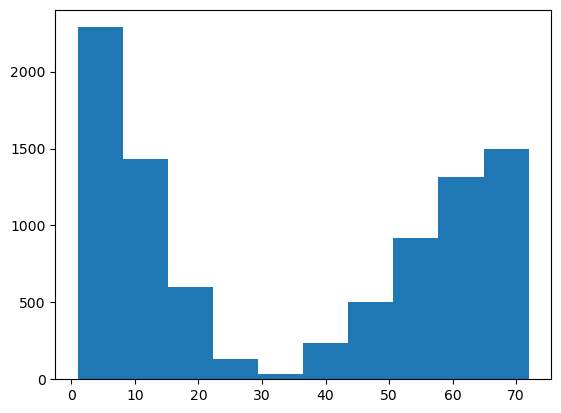

In [80]:
# Histogram for Initial days
plt.hist(df['Initial_days']);

In [81]:
# Reason for admission compared to null initial days
null_initial_days = df[df['Initial_days'].isnull()]
initial_admin_values = null_initial_days['Initial_admin']
print(initial_admin_values)

7       Observation Admission
49      Observation Admission
52        Emergency Admission
57      Observation Admission
62        Emergency Admission
                ...          
9956       Elective Admission
9960       Elective Admission
9969       Elective Admission
9979       Elective Admission
9997       Elective Admission
Name: Initial_admin, Length: 1056, dtype: object


In [82]:
# Reason for admission compared to null initial days
initial_admin_values.unique()

array(['Observation Admission', 'Emergency Admission',
       'Elective Admission'], dtype=object)

In [83]:
# Value counts for reason for admission where initial days are null
initial_admin_values.value_counts()

Initial_admin
Emergency Admission      548
Observation Admission    268
Elective Admission       240
Name: count, dtype: int64

In [84]:
# Checking the statistics for initial days
df['Initial_days'].describe()

count    8944.000000
mean       34.432082
std        26.287050
min         1.001981
25%         7.911709
50%        34.446941
75%        61.124654
max        71.981486
Name: Initial_days, dtype: float64

In [85]:
# Value Counts for total charge
df['TotalCharge'].value_counts()

TotalCharge
3191.048774     1
7329.393066     1
8498.290160     1
8451.833926     1
7530.770634     1
               ..
2065.518265     1
3409.593273     1
15289.590000    1
4383.419018     1
8700.856021     1
Name: count, Length: 10000, dtype: int64

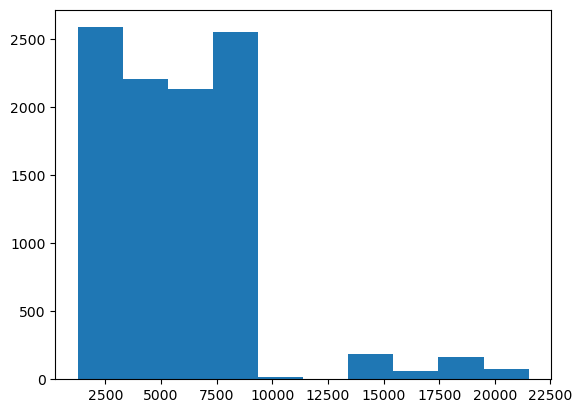

In [86]:
# Histogram for the total charge
plt.hist(df['TotalCharge']);

In [87]:
# Value counts for additional charges
df['Additional_charges'].value_counts()

Additional_charges
8013.787149     5
22000.064780    4
3241.339760     4
11303.682330    4
8755.123303     4
               ..
20461.526600    1
13357.949060    1
5316.329223     1
24412.109160    1
11643.189930    1
Name: count, Length: 8888, dtype: int64

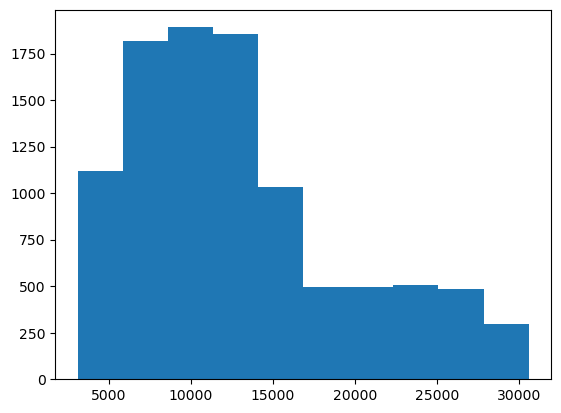

In [88]:
# Histogram for additional charges
plt.hist(df['Additional_charges']);

In [89]:
# Value counts for survey question 1
df['Item1'].value_counts()

Item1
4    3455
3    3404
5    1377
2    1315
6     225
1     213
7      10
8       1
Name: count, dtype: int64

In [90]:
# Value counts for survey question 2
df['Item2'].value_counts()

Item2
3    3439
4    3351
5    1421
2    1360
1     213
6     204
7      12
Name: count, dtype: int64

In [91]:
# Value counts for survey question 3
df['Item3'].value_counts()

Item3
4    3464
3    3379
5    1358
2    1356
6     220
1     211
7      11
8       1
Name: count, dtype: int64

In [92]:
# Value counts for survey question 4
df['Item4'].value_counts()

Item4
3    3422
4    3394
5    1388
2    1346
6     231
1     207
7      12
Name: count, dtype: int64

In [93]:
# Value counts for survey question 5
df['Item5'].value_counts()

Item5
4    3446
3    3423
2    1380
5    1308
6     219
1     211
7      13
Name: count, dtype: int64

In [94]:
# Value counts for survey question 6
df['Item6'].value_counts()

Item6
4    3464
3    3371
5    1403
2    1319
6     220
1     213
7      10
Name: count, dtype: int64

In [95]:
# Value counts for survey question 7
df['Item7'].value_counts()

Item7
4    3487
3    3456
2    1345
5    1274
1     215
6     212
7      11
Name: count, dtype: int64

In [96]:
# Value counts for survey question 8
df['Item8'].value_counts()

Item8
3    3401
4    3337
5    1429
2    1391
6     221
1     209
7      12
Name: count, dtype: int64

### Part 3: Data-Cleaning

#### D. Treatment

1. Findings
    * CaseOrder, Customer_id, Interaction, and UID do not need new datatypes but do need to renamed with python standard. 
    * City, State, county need to be renamed with lower case
    * Zip needs to be changed to a string and the leading zero added back to the relevant zip codes.
    * Latitude and Longitude need to be renamed with lower case and better descriptive names
    * Population needs to be lower case
    * Area needs to be reclassified as a category and lower case
    * Timezone needs to be changed to the standard time zones without cities and then reclassified as a category and renamed.
    * Job needs to be lowercase
    * Children needs to be an int. There is also the issue of null values for children. Since there is a zero value we can't assume that the null values are just zeros. The mean for children is around 2 and there are about 3000 null values. Under different circumstances I think that the null values should be investigated further within the original data set and most likely ruled to stay as null, however since this class is about data cleaning I am going to use univariate imputation to fill in the missing values with the mean. This may skew the data more than is advised but I do not think it will ruin the integrity of the data. 
    * Age also needs to become an int and like Children I will be performing univariate imputation on the null values although the same caution applies here as well. 
    * Education needs to become a category data type and have ordinal encoding 
    * Employment needs to be lowercase and have ordinal encoding
    * Income needs to be lowercase. Income also has missing values which I will fill in with the median since the distribution is skewed. Income also has some values that could be considered outliers on the upper end. However looking at the rows the larger incomes are valid data and removing them would be inappropriate. 
    * Marital needs to become a category
    * Gender needs to become a category. The Gender column also has an issue that cannot easily be fixed. The data dictionary says that gender is self identified as "Male", "Female", or "Nonbinary". However the data itself is "Male", "Female", or "Prefer not to answer". Prefering not to answer is not the same as nonbinary and it would be irresponsible to change the phrasing "Prefer not to answer" to "Nonbinary". I cannot go look at the form patients fill out to see if the option is nonbinary or prefer not to answer therefore I cannot fix this error responsibly. To change the "prefer not to answer" to "nonbinary" as it says in the data dictionary would be unethical therefore I will keep the values as they are and advise that this issue needs to be corrected.
    * All binary columns are going to be turned into 1/0 binaries, with 1 representing yes and 0 representing no. This will allow for easier analysis.
    * Readmission needs to be 1/0 and also renamed
    * VitD_levels need to be renamed
    * Doc visits need to be renamed
    * Full meals eaten needs to be renamed
    * Vit D supp needs to be renamed
    * Soft_drink is a binary and needs to be 1/0. There are missing values in soft_drink. Since this is a binary and there are not a significant amount of missing values I will use the most frequent answer to fill in the nulls. 
    * Initial admin needs to be a category
    * High Blood needs to be 1/0
    * Stroke needs to be 1/0
    * Complication_risk needs to be 1/0
    * Overweight is already a 1/0 binary and will be left that way however, similar to soft_drink I will use the most frewuent to fill in the null values.
    * Arthritis needs to be 1/0
    * Diabetes needs to be 1/0
    * Hyperlipidemia needs to be 1/0
    * Backpain needs to be 1/0
    * Anxiety is already 1/0 and will be left and like overweight and Soft_drink I will use the most frequent to fill in the null values.
    * Allergic_rhinitis needs to 1/0
    * Reflux_esophagitis needs to be 1/0
    * Asthma needs to be 1/0
    * Services needs to be a category
    * Initial_days has some complicated issues with it. First of all the initial days are stored as decimals which makes me think that initial days was actually tracked by hours in the hospitals and was converted to days. Is there a reason that we use days instead of hours? Probably because days will be easier for analysis. However days with decimals is not easier for analysis. Therefore I think the best course of action here would be to round all the decimals away. From looking at the inital day values I know there are no zeros, which makes sense to be because people typically do not stay in the hospital for less than a day unless it's for observation which I checked and not all the null values are for observation, however people do stay in the hospital for less than 24 hours (for instance if they are checked in at noon and discharged at 10 that would be a day but not 24 hours). Therefore my assumption is that the null values are those values that were under 1 but 22 hours or so. I think that rounding those null values up to 1 day would not be helpful for analysis since stays for 26 hours will be rounded down to 1 day and a hospital stay of 26 hours is categorically different for purposes of readmission analysis than stays of 20 hours. Therefore I am going to change the null values to be zero with the note that for analysis a zero day stay should be considered as admission that lasted less than 24 hours. This will keep the integrity of the data and make analysis better. 
    * Total Charge should be renamed
    * Additional_charges should be renamed
    * The Survey items should be renamed for clarity. The survey scores are already ordinally mapped and stored so I will not be changing that.
    * All of the columns need to be lowercase, use underscores where needed, and many need to be renamed for clarity. 
    
---
    
2. Why
    * **Duplicates:** No duplicates were found in the data and so there is no treatement for duplicates.
    * **Missing Values:** For the columns Children and Income I will be using univarite imputation to fill in the null values with the median value since they are both skewed distribution. We know that the nulls are not just zeros for these two columns and filling in the data will not mess with the integrity of the whole dataset. Using univarite imputation on these columns which are missing a larger amount of values will allow us to use the data in analysis while dropping the rows would reduce the data too much for a valid analysis. This is the same reasoning for the age column nulls, however since age is uniformly distributed I will use the mean to fill in the nulls. For the binary columns of soft_drink, Overweight, and Anxiety using univariate imputation with the most frequent answer will be the best way to maintain the distribution of the variables and not reduce the dataset. For the null values of initial_days I have made the assumption that the nulls are a representation of patients who spent less than 24 hours in the hospital. This is supported by the fact that there are no values under 1 in the column and by the existance of the decimals which suggests the original tracking of days in hospital was done in hours. Therefore I will replace those null values with zero's and note that that means in this context less than 24 hours spent in hospital. This will allow for the best analysis of this variable. 
   * **Outliers:** I have detected outliers in the income and the vitamin D level columns. For income I looked at the full rows of the highest incomes that were the outliers and decided that none of these values are incorrect. Income just happens to be wildly disparate and therefore it is expected for there to be outliers for income. Removing these higher income rows would distort the data where income might be a very important variable for hospital readmission. For vitamin D levels there are outliers at the top end again. Normal vitamin D levels are in the 50s which is where all of the outliers are suggesting that these people are not anomalies but simply not in hospital for something that will affect their vitamin D levels. Therefore, again, it would be bad to remove these values. 
    
---

3. Results

    With the described changes the dataset is more streamlined and will allow for easier analysis. Each of the columns is properly formated for the data it contains so that the correct analysis can be done and the data has been simplified while keeping the integrity for better analysis to be performed. Visualizations of the cleaned data has been provided below in the code. 
    
---
    
4. Code

In [97]:
# Convert the Zip column to a string and then pad any values with 4 numbers with a leading 0
df['Zip'] = df['Zip'].astype("str").str.zfill(5)

# Check the column type
df['Zip'].value_counts()

Zip
25674    4
78104    4
68355    4
62098    4
24136    4
        ..
18337    1
58442    1
71353    1
81612    1
15108    1
Name: count, Length: 8612, dtype: int64

In [98]:
# Check that all values are 5 long
all_have_five_values = all(len(str(value)) == 5 for value in df['Zip'])
print(all_have_five_values)

True


In [99]:
# Fix the Timezone sections to the standard US time zones without the city attached
df.Timezone.replace({
    # Puerto Rica has it's own time zone
    'America/Puerto_Rico' : "US - Puerto Rico",
    # All the cities in the US Eastern zone
    'America/New_York' : 'US - Eastern',
    'America/Detroit' : 'US - Eastern',
    'America/Indiana/Indianapolis' : 'US - Eastern',
    'America/Indiana/Vevay' : 'US - Eastern',
    'America/Indiana/Vincennes' : 'US - Eastern',
    'America/Kentucky/Louisville' : 'US - Eastern',
    'America/Toronto' : 'US - Eastern',
    'America/Indiana/Marengo' : 'US - Eastern',
    'America/Indiana/Winamac' : 'US - Eastern',
    # All the cities in US Central zone
    'America/Chicago' : 'US - Central',
    'America/Menominee' : 'US - Central',
    'America/Indiana/Knox' : 'US - Central',
    'America/Indiana/Tell_City' : 'US - Central',
    'America/North_Dakota/Beulah' : 'US - Central',
    'America/North_Dakota/New_Salem' : 'US - Central',
    # All the Cities in US Mountain zone
    'America/Denver' : 'US - Mountain',
    'America/Boise' : 'US - Mountain',
    # Arizona which is Mountain but doesn't observe day light savings
    'America/Phoenix' : 'US - Arizona',
    # The city in Pacific time
    'America/Los_Angeles' : 'US - Pacific',
    # Alaskan Time zone
    'America/Nome' : 'US - Alaskan',
    'America/Anchorage' : 'US - Alaskan',
    'America/Sitka' : 'US - Alaskan',
    'America/Yakutat' : 'US - Alaskan',
    # Hawaiian Time Zone that doesn't observe day light savings
    'Pacific/Honolulu' : 'US - Hawaiian',
    # Aleutian time zone that observes day light savings and otherwise would be with Hawaiian
    'America/Adak' : 'US - Aleutian'
    }, inplace = True)

C:\Users\natal\AppData\Local\Temp\ipykernel_21412\3965041800.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Timezone.replace({


In [100]:
# Check that none of the timezone with the city name attached remain
df['Timezone'].value_counts()

Timezone
US - Eastern        4326
US - Central        3792
US - Pacific         937
US - Mountain        698
US - Arizona         100
US - Alaskan          69
US - Puerto Rico      43
US - Hawaiian         34
US - Aleutian          1
Name: count, dtype: int64

In [101]:
# Change the relevant columns to a category data type
df['Area'] = df['Area'].astype('category')
df['Timezone'] = df['Timezone'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Employment'] = df['Employment'].astype('category')
df['Marital'] = df['Marital'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Initial_admin'] = df['Initial_admin'].astype('category')
df['Services'] = df['Services'].astype('category')

In [102]:
# Check that the columns are all category datatype
df.dtypes

Unnamed: 0               int64
CaseOrder                int64
Customer_id             object
Interaction             object
UID                     object
City                    object
State                   object
County                  object
Zip                     object
Lat                    float64
Lng                    float64
Population               int64
Area                  category
Timezone              category
Job                     object
Children               float64
Age                    float64
Education             category
Employment            category
Income                 float64
Marital               category
Gender                category
ReAdmis                 object
VitD_levels            float64
Doc_visits               int64
Full_meals_eaten         int64
VitD_supp                int64
Soft_drink              object
Initial_admin         category
HighBlood               object
Stroke                  object
Complication_risk       object
Overweig

In [103]:
# Create Ordinal Encoding for the relevant columns
# Order the schooling in a hierarchy
education_order = [
    "No Schooling Completed",
    "Nursery School to 8th Grade",
    "9th Grade to 12th Grade, No Diploma",
    "GED or Alternative Credential",
    "Regular High School Diploma",
    "Some College, Less than 1 Year",
    "Some College, 1 or More Years, No Degree",
    "Associate's Degree",
    "Bachelor's Degree",
    "Master's Degree",
    "Professional School Degree",
    "Doctorate Degree"
]
# Create a mapping for the education order 
education_mapping = {education: index for index, education in enumerate(education_order)}
# Apply ordinal encoding to the column using the mapping
df['education_ordinal'] = df['Education'].map(education_mapping)
# Check the new ordinal column
df['education_ordinal'].value_counts()

education_ordinal
4     2444
8     1724
6     1484
2      832
7      797
9      701
5      642
1      552
3      389
10     208
0      133
11      94
Name: count, dtype: int64

In [104]:
# Do the same for Employment, start with the heirarchy list
employment_order = [
    "Unemployed",
    "Student",
    "Part Time",
    "Full Time",
    "Retired"
]

# Create a dictionary mapping each employment level to its corresponding ordinal value
employment_mapping = {employment: index for index, employment in enumerate(employment_order)}

# Apply ordinal encoding to the "Employment" column using the defined mapping
df['employment_ordinal'] = df['Employment'].map(employment_mapping)

# Check the new column
df['employment_ordinal'].value_counts()

employment_ordinal
3    6029
1    1017
2     991
0     983
4     980
Name: count, dtype: int64

In [105]:
# Use univariate imputation on Children and income using the median and age using the mean
# Define the columns
columns_to_impute = ['Children', 'Income']

# Create the SimpleImputer object with strategy='median'
imputer = SimpleImputer(strategy='median')

# Perform imputation on the specified columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [106]:
# Define the Age column
columns_to_impute = ['Age']

# Create the SimpleImputer object with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Perform imputation on the specified columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [107]:
# Check there are no longer null values in children, income, age
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          10000 non-null  int64   
 1   CaseOrder           10000 non-null  int64   
 2   Customer_id         10000 non-null  object  
 3   Interaction         10000 non-null  object  
 4   UID                 10000 non-null  object  
 5   City                10000 non-null  object  
 6   State               10000 non-null  object  
 7   County              10000 non-null  object  
 8   Zip                 10000 non-null  object  
 9   Lat                 10000 non-null  float64 
 10  Lng                 10000 non-null  float64 
 11  Population          10000 non-null  int64   
 12  Area                10000 non-null  category
 13  Timezone            10000 non-null  category
 14  Job                 10000 non-null  object  
 15  Children            10000 non-null  f

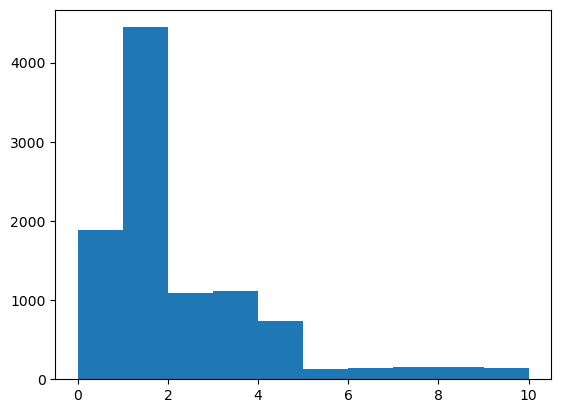

In [108]:
# Check the distribution of Children
plt.hist(df['Children']);

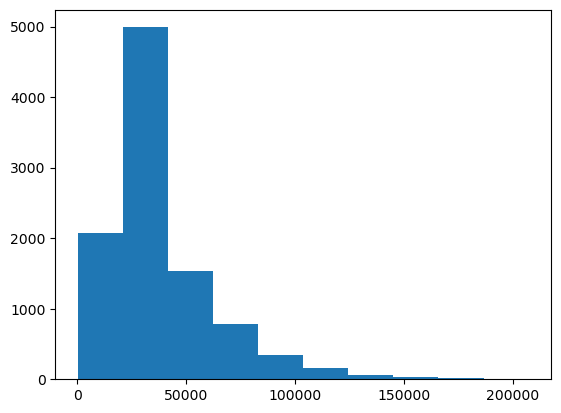

In [109]:
# Check the distribution of Income
plt.hist(df['Income']);

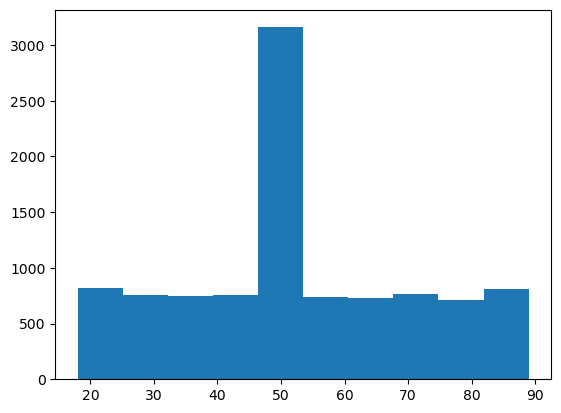

In [110]:
# Check the distribution of Age
plt.hist(df['Age']);

In [111]:
# Change all nulls in Initial days to 0
df['Initial_days'].fillna(0, inplace=True)

C:\Users\natal\AppData\Local\Temp\ipykernel_21412\138112672.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Initial_days'].fillna(0, inplace=True)


In [112]:
# Check that initial days as no nulls
sum(df['Initial_days'].isnull())

0

In [113]:
# Before being about to univariate imputate the most frequent value I need to turn soft_drink into a 1/0
df['Soft_drink'] = df['Soft_drink'].replace({'Yes': 1, 'No': 0})

C:\Users\natal\AppData\Local\Temp\ipykernel_21412\3540527947.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Soft_drink'] = df['Soft_drink'].replace({'Yes': 1, 'No': 0})


In [114]:
# Checking to make sure that worked
df['Soft_drink'].value_counts()

Soft_drink
0.0    5589
1.0    1944
Name: count, dtype: int64

In [115]:
# create an object for replacing the nulls with the most frequent value
binary_imputer = SimpleImputer(strategy='most_frequent')

# Impute the null values in the three columns
binary_columns = ['Soft_drink', 'Overweight', 'Anxiety']
df[binary_columns] = binary_imputer.fit_transform(df[binary_columns])

In [116]:
#Check the three columns to make sure there are no null values
# Soft_drink first
df['Soft_drink'].value_counts()

Soft_drink
0.0    8056
1.0    1944
Name: count, dtype: int64

In [117]:
# Check for no nulls in Overweight
df['Overweight'].value_counts()

Overweight
1.0    7377
0.0    2623
Name: count, dtype: int64

In [118]:
#Check for no nulls in Anxiety
df['Anxiety'].value_counts()

Anxiety
0.0    7094
1.0    2906
Name: count, dtype: int64

In [119]:
# Define a list of columns to convert from "yes" and "no" to 1 and 0
columns_to_convert = ['ReAdmis', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes','Hyperlipidemia', 'BackPain', 
                      'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']

# Convert the columns from "yes" and "no" to 1 and 0 using the mapping
df[columns_to_convert] = df[columns_to_convert].replace({'Yes': 1, 'No': 0})

# Convert the specified columns to integer data types
df[columns_to_convert] = df[columns_to_convert].astype(int)

C:\Users\natal\AppData\Local\Temp\ipykernel_21412\2028938358.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_convert] = df[columns_to_convert].replace({'Yes': 1, 'No': 0})


In [120]:
# Convert anxiety and overweight and Soft_drink from float to int
df['Overweight'] = df['Overweight'].astype(int)
df['Anxiety'] = df['Anxiety'].astype(int)
df['Soft_drink'] = df['Soft_drink'].astype(int)

In [121]:
# Convert Complication risk to 1, 2, 3 for low, medium, high
risk_mapping = {'High': 3, 'Medium': 2, 'Low': 1}

# Map the values in the "complication_risk" column using the defined mapping
df['Complication_risk'] = df['Complication_risk'].map(risk_mapping)

# Convert to int type
df['Complication_risk'] = df['Complication_risk'].astype(int)

In [122]:
# Check the results
df['Complication_risk'].value_counts()

Complication_risk
2    4517
3    3358
1    2125
Name: count, dtype: int64

In [123]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          10000 non-null  int64   
 1   CaseOrder           10000 non-null  int64   
 2   Customer_id         10000 non-null  object  
 3   Interaction         10000 non-null  object  
 4   UID                 10000 non-null  object  
 5   City                10000 non-null  object  
 6   State               10000 non-null  object  
 7   County              10000 non-null  object  
 8   Zip                 10000 non-null  object  
 9   Lat                 10000 non-null  float64 
 10  Lng                 10000 non-null  float64 
 11  Population          10000 non-null  int64   
 12  Area                10000 non-null  category
 13  Timezone            10000 non-null  category
 14  Job                 10000 non-null  object  
 15  Children            10000 non-null  f

In [124]:
# Turn the relevant columns to int datatype
df['Age'] = df['Age'].astype(int)
df['Children'] = df['Children'].astype(int)
df['Initial_days'] = df['Initial_days'].astype(int)

In [125]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          10000 non-null  int64   
 1   CaseOrder           10000 non-null  int64   
 2   Customer_id         10000 non-null  object  
 3   Interaction         10000 non-null  object  
 4   UID                 10000 non-null  object  
 5   City                10000 non-null  object  
 6   State               10000 non-null  object  
 7   County              10000 non-null  object  
 8   Zip                 10000 non-null  object  
 9   Lat                 10000 non-null  float64 
 10  Lng                 10000 non-null  float64 
 11  Population          10000 non-null  int64   
 12  Area                10000 non-null  category
 13  Timezone            10000 non-null  category
 14  Job                 10000 non-null  object  
 15  Children            10000 non-null  i

In [126]:
# Round Initial days to whole numbers
df['Initial_days'] = df['Initial_days'].round()

In [127]:
# Check initial days
df['Initial_days'].value_counts()

Initial_days
0     1056
1      344
3      333
2      325
6      323
      ... 
29       6
33       3
31       3
35       2
32       2
Name: count, Length: 71, dtype: int64

In [128]:
# Get the current column names from the DataFrame
current_columns = df.columns.tolist()
current_columns

['Unnamed: 0',
 'CaseOrder',
 'Customer_id',
 'Interaction',
 'UID',
 'City',
 'State',
 'County',
 'Zip',
 'Lat',
 'Lng',
 'Population',
 'Area',
 'Timezone',
 'Job',
 'Children',
 'Age',
 'Education',
 'Employment',
 'Income',
 'Marital',
 'Gender',
 'ReAdmis',
 'VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'VitD_supp',
 'Soft_drink',
 'Initial_admin',
 'HighBlood',
 'Stroke',
 'Complication_risk',
 'Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma',
 'Services',
 'Initial_days',
 'TotalCharge',
 'Additional_charges',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8',
 'education_ordinal',
 'employment_ordinal']

In [129]:
columns_to_drop = [0]
df.drop(df.columns[columns_to_drop], axis=1, inplace=True)

In [130]:
current_columns = df.columns.tolist()
current_columns

['CaseOrder',
 'Customer_id',
 'Interaction',
 'UID',
 'City',
 'State',
 'County',
 'Zip',
 'Lat',
 'Lng',
 'Population',
 'Area',
 'Timezone',
 'Job',
 'Children',
 'Age',
 'Education',
 'Employment',
 'Income',
 'Marital',
 'Gender',
 'ReAdmis',
 'VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'VitD_supp',
 'Soft_drink',
 'Initial_admin',
 'HighBlood',
 'Stroke',
 'Complication_risk',
 'Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma',
 'Services',
 'Initial_days',
 'TotalCharge',
 'Additional_charges',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8',
 'education_ordinal',
 'employment_ordinal']

In [131]:
# Rename all columns to be lowercase, use underscores where appropriate, and descriptive
better_columns = ['case_order', 'customer_id', 'interaction_id', 'uid', 'city', 'state', 'county', 'zip_code', 'latitude',
                  'longitude', 'population', 'urbanization', 'timezone', 'job', 'children', 'age', 'education', 
                  'employment_status', 'income', 'marital_status', 'gender', 'readmission', 'vitamin_d_levels', 'doctor_visits', 'full_meals', 'vitamin_d_suppliment',
                  'soft_drink', 'initial_admission', 'high_blood_pressure', 'stroke', 'complication_risk', 'overweight',
                  'arthritis', 'diabetes', 'hyperlipidemia', 'back_pain', 'anxiety', 'allergic_rhinitis', 'reflux_esophagitis',
                  'asthma', 'services', 'initial_stay', 'daily_charge', 'additional_charge', 'survey_timely_admission',
                  'survey_timely_treatment', 'survey_timely_visits', 'survey_reliability', 'survey_options',
                  'survey_treatment_hours', 'survey_courteous_staff', 'survey_active_listening', 'education_ordinal', 'employment_ordinal']

# Ensure that the number of elements in better_columns matches the current number of columns in the DataFrame
if len(better_columns) != df.shape[1]:
    raise ValueError("Length mismatch: The number of elements in better_columns does not match the current number of columns in the DataFrame.")

# Set the new columns 
df = df.set_axis(better_columns, axis=1)

In [132]:
# create a new cleaned df
clean_df = df

# Check the clean data
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   case_order               10000 non-null  int64   
 1   customer_id              10000 non-null  object  
 2   interaction_id           10000 non-null  object  
 3   uid                      10000 non-null  object  
 4   city                     10000 non-null  object  
 5   state                    10000 non-null  object  
 6   county                   10000 non-null  object  
 7   zip_code                 10000 non-null  object  
 8   latitude                 10000 non-null  float64 
 9   longitude                10000 non-null  float64 
 10  population               10000 non-null  int64   
 11  urbanization             10000 non-null  category
 12  timezone                 10000 non-null  category
 13  job                      10000 non-null  object  
 14  childre

5. CSV File
    The cleaned data set is provided as clean_data.csv

In [133]:
clean_df.to_csv('clean_data.csv', index = False)

6. Disadvantages
    * Using the imputation method for Age, Income, and Children definitely skewed the data more than is desired. This is especially obvious with Age where we can see the histogram spikes drastically with the imputed data. 
    * Deciding to use the most frequent result to fill in the null values for Soft drink, anxiety, and overweight will certainly cause some distortion in the dataset. However because those columns didn't have a huge amount of missing data the distortion will be minimal, better than a reduced dataset. 
    * There were no duplicates in the data so there were no disadvantages there. 
    * Leaving the outliers in income especially could skew the data since there are such disparities between the wealthier end and poor end. 

---

7. Challenges
    As discussed using the most frequent value for the nulls in the binary columns will distort the data and an analyst should be aware that this has happened. Though there are other ways to have dealt with these null values since there aren't too many nulls in the columns using this method is a good and valid way to deal with the nulls while keeping the integrity of the dataset. 
    
    Deciding to translate the null values from initial days at hospital as 0 and removing the decimals could cause some incorrect conclusions. Since hospital stays are tracked in hours in the data there is the possibility that rounding the numbers to count in days will affect any nuance in the dataset analysis. However for the sake of the research question, which is what factors affect readmission, I decided that an analyst would be better served using days for the analysis over hours. However not being privvy to the specific needs and processes of the hospitals this is an assumption that very well could make the analysis harder. 
    
    The gender columm disconnect between the data dictionary and the data itself and my choice to not correct is an issue that the data analyst will have to correct on their own, whether that means correcting the data dictionary or changing the variables in the gender column. However I stand by my statement that to fix this issue without understanding the actual question patients were answering would be unethical. Preferring not to state your gender and being non-binary are far from the same issue and hospitals, data analysts, and myself have a responsibility to treat gender and people with respect. 

### Part 4: PCA and Sources

#### E. PCA

1. Variables and Output
    Since principal component analysis required numeric variables that are on the same scale and are quantitative I will be using the following variables: 
    * population, children, age, income, vitamin_d_levels, initial_stay, daily_charge, additional_charge

In [134]:
# Create new DataFrame with numeric columns
pca_df = clean_df[['population', 'children', 'age', 'income', 'vitamin_d_levels', 'initial_stay', 'daily_charge', 
                   'additional_charge']]

# Normalize the columns and fit to the PCA
pca_df_normalized = (pca_df - pca_df.mean()) / pca_df.std()
pca = PCA(n_components=pca_df.shape[1])
pca.fit(pca_df_normalized)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC{}'.format(i+1) for i in range(pca_df_normalized.shape[1])],
                        index=pca_df_normalized.columns)

In [135]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
population,0.017684,-0.025762,0.574139,0.076146,-0.658803,-0.479011,0.010772,-0.001206
children,0.003324,0.011706,0.459292,0.469729,0.684244,-0.316200,0.009099,0.001383
age,0.094208,0.700392,0.011832,-0.015087,-0.013750,0.012354,0.706797,0.017459
income,-0.008393,-0.005452,0.020052,0.779955,-0.293714,0.552127,0.007465,0.000221
vitamin_d_levels,0.558967,-0.067443,-0.416420,0.247549,-0.055951,-0.356601,0.023645,-0.563443
initial_stay,0.419744,-0.074487,0.533947,-0.321992,0.088243,0.488147,0.005815,-0.428228
daily_charge,0.702145,-0.090333,-0.008038,0.001817,0.006115,0.010766,-0.021404,0.705800
additional_charge,0.095363,0.700260,0.017420,0.005937,-0.019423,-0.001426,-0.706493,-0.026297


2. PCs to Keep
    The Pricipal components recognized by the PCA analysis are: 
    * PC1 through PC4
    These values have eigenvalues above 1 which is the threshold according to the Kaiser rule. This is shown by the visualization below and the list of eigenvalues.

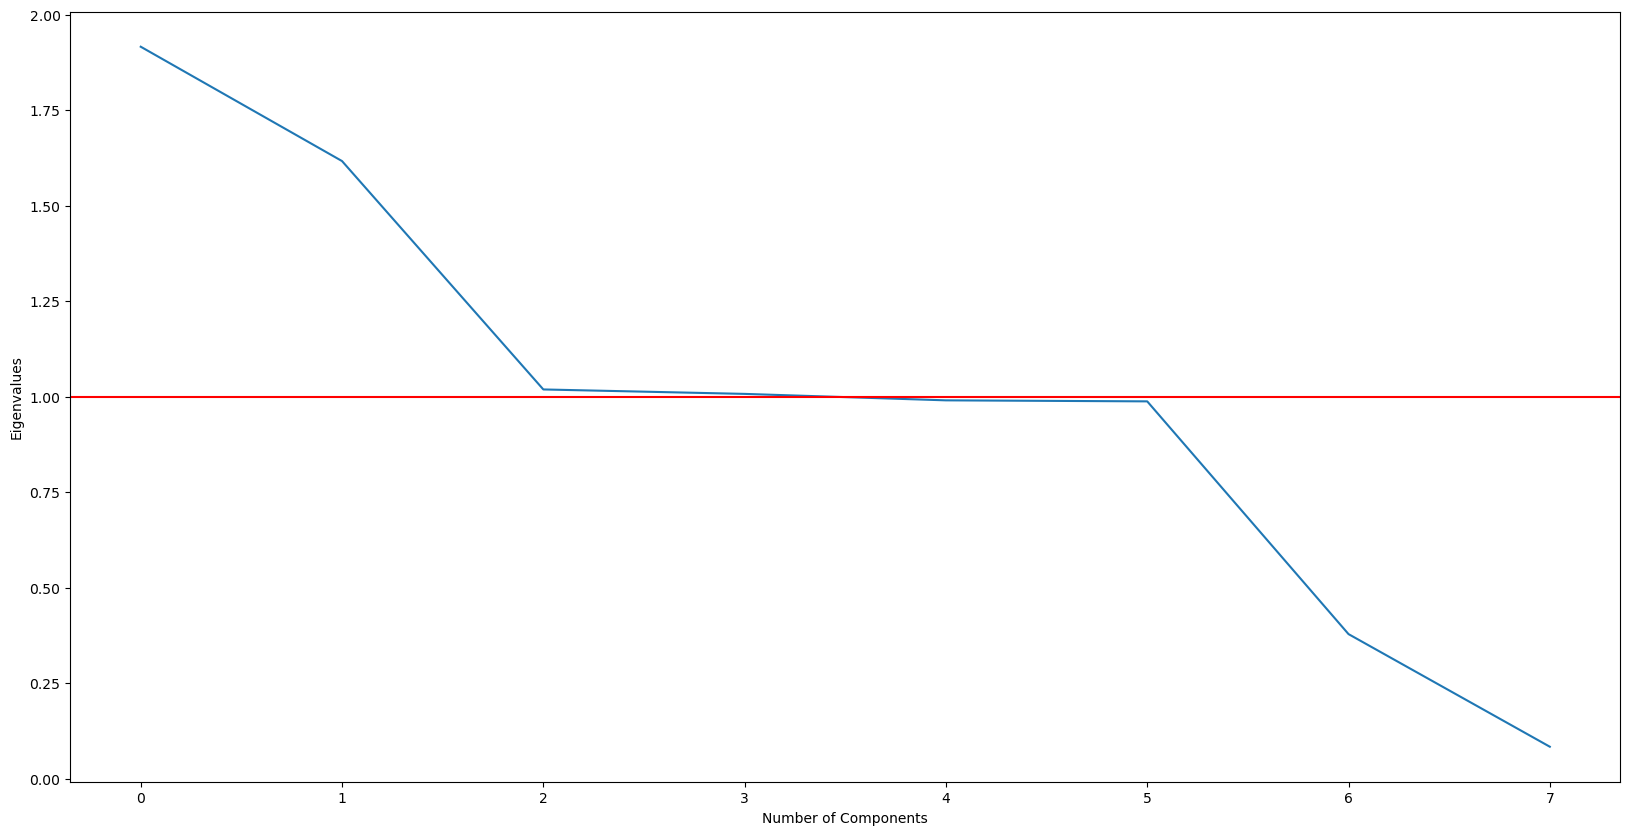

In [136]:
# Create the covariance matrix
covariance = np.dot(pca_df_normalized.T, pca_df_normalized)/pca_df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(covariance, eigenvector)) for eigenvector in pca.components_]

plt.figure(figsize = [20,10])
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y = 1, color = 'red')
plt.show();

In [137]:
eigenvalues

[1.9161505397733958,
 1.6167995170834168,
 1.0189037334562205,
 1.0072686269098974,
 0.9903804341409204,
 0.9877063303815665,
 0.37840958272683545,
 0.08358123552777431]

3. PCA Benefits
    The benefits of the PCA is that it can help breakdown a dataset with a large amount of variables to the variables that will actually be useful for the analysis. It is usefull to be able to focus on the variables with the most amount of impact to the research question so as to save time on analysis that results in little or no usable suggestions. The PCA also reduces the chances of variables seeming to be more important than they really are and provides a framework for grouping the data for further analysis and computer learning. In this dataset specifically 

F. Panopto Recording

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=791500ab-dfa0-49ee-9b88-b04b01693993

---

G. Code Sources

No additional code sources were used beyond what is listed in references

---

H. References

Larose, C. D., & Larose, D. T. (2019). Data science using Python and R. ISBN-13: 978-1-119-52684-1

The course resources, especially the four videos, were also used as reference especially for the PCA. 